# MEALPY

Module Mealpy conçu pour tous les types d'optimisation. En particulier, pour l'optimisation multi-objectif, il utilise exclusivement la méthode des poids. Ci-dessous se trouvent différents tests avec différents algorithmes testés.

## PSO


### Ex quelconque simple

In [1]:
import numpy as np

from mealpy import FloatVar, PSO

# Objectifs 
calls = 0
def objective_function(solution):
    global calls
    calls+=1

    return [(solution[0]-1)**2 + (solution[1]-2)**2, (solution[0]+1)**2 + (solution[1]-1)**2]

# Bornes, caractère des variables, sens de l'optimisation, poids de chaque objectif
problem_dict = {

    "bounds": FloatVar( lb=(-10.,) * 2, ub=(10.,) * 2, name="delta"),

    "obj_func": objective_function,

    "minmax": "min",

    "obj_weights" : [0.5,0.5],

}

# Algorithme choisi; voir https://mealpy.readthedocs.io/en/latest/pages/models/mealpy.html si besoin de tester un nouvel algo.
model = PSO.AIW_PSO(epoch=1000, pop_size=50, c1=2.05, c2=2.05, alpha=0.4)

g_best = model.solve(problem_dict)

print(f"Solution: {g_best.solution}, Fitness: {objective_function(g_best.solution)}")

print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

2024/04/19 09:08:50 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: Solving 2-objective optimization problem with weights: [0.5 0.5].
2024/04/19 09:08:50 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: >>>Problem: P, Epoch: 1, Current best: 2.1466814581971523, Global best: 2.1466814581971523, Runtime: 0.00208 seconds
2024/04/19 09:08:50 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: >>>Problem: P, Epoch: 2, Current best: 2.1466814581971523, Global best: 2.1466814581971523, Runtime: 0.00207 seconds
2024/04/19 09:08:50 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: >>>Problem: P, Epoch: 3, Current best: 2.1466814581971523, Global best: 2.1466814581971523, Runtime: 0.00197 seconds
2024/04/19 09:08:50 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: >>>Problem: P, Epoch: 4, Current best: 1.419429919725633, Global best: 1.419429919725633, Runtime: 0.00175 seconds
2024/04/19 09:08:50 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: >>>Problem: P, Epoch: 5, Current best: 1.419429919725633, Global best: 1.419429919725633, Runtim

Solution: [-0.01822299  1.50803091], Fitness: [1.27881163432251, 1.2219815114001173]
Solution: [-0.01822299  1.50803091], Fitness: 1.2503965728613138


In [2]:
print(calls)

50052


### Ackley

In [3]:
import numpy as np

from mealpy import FloatVar, PSO

calls = 0
def objective_function(x):
    global calls
    calls+=1

    return -20*np.exp(-0.2*np.sqrt(0.5*(x[0]**2 + x[1]**2+x[2]**2+x[3]**2))) - np.exp(1/4*(np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1])+np.cos(2*np.pi*x[2])+np.cos(2*np.pi*x[3]))) + np.exp(1) +20


problem_dict = {

    "bounds": FloatVar( lb=(-10.,) * 4, ub=(10.,) * 4, name="delta"),

    "obj_func": objective_function,

    "minmax": "min",

    #"obj_weights" : [0.5,0.5],

}


model = PSO.AIW_PSO(epoch=1000, pop_size=1000, c1=2.05, c2=2.05, alpha=0.4)

g_best = model.solve(problem_dict)

print(f"Solution: {g_best.solution}, Fitness: {objective_function(g_best.solution)}")

print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

2024/04/19 09:09:00 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: Solving single objective optimization problem.
2024/04/19 09:09:00 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: >>>Problem: P, Epoch: 1, Current best: 5.632622720134755, Global best: 5.632622720134755, Runtime: 0.03937 seconds
2024/04/19 09:09:00 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: >>>Problem: P, Epoch: 2, Current best: 5.632622720134755, Global best: 5.632622720134755, Runtime: 0.03705 seconds
2024/04/19 09:09:01 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: >>>Problem: P, Epoch: 3, Current best: 5.376140542178806, Global best: 5.376140542178806, Runtime: 0.03887 seconds
2024/04/19 09:09:01 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: >>>Problem: P, Epoch: 4, Current best: 5.191080507162933, Global best: 5.191080507162933, Runtime: 0.03780 seconds
2024/04/19 09:09:01 AM, INFO, mealpy.swarm_based.PSO.AIW_PSO: >>>Problem: P, Epoch: 5, Current best: 5.137777948276042, Global best: 5.137777948276042, Runtime: 0.04022 seconds
2024/0

Solution: [ 0.12590373 -0.25305709  0.28617485  0.00131384], Fitness: 2.3842288845324546
Solution: [ 0.12590373 -0.25305709  0.28617485  0.00131384], Fitness: 2.3842288845324546


In [12]:
import numpy as np
from mealpy import PSO, FloatVar

## This is how you design Constrained Benchmark Function (G01)
#### Link: https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119136507.app2
def objective_function(solution):
    def g1(x):
        return x[0]**2+x[1]**2-225
    def g2(x):
        return x[0]-3*x[1] +10

    def violate(value):
        return 0 if value <= 0 else value

    fx1 = (solution[0]-2)**2 + (solution[1]-1)**2 +2
    fx2 = 9*solution[0] - (solution[1]-1)**2

    ## Increase the punishment for g1 and g4 to boost the algorithm (You can choice any constraint instead of g1 and g4)
    fx1 += violate(g1(solution)) ** 2 + violate(g2(solution)) 
    fx2 += violate(g1(solution)) ** 2 + violate(g2(solution)) 
    return [fx1,fx2]

## Design a problem dictionary for constrained objective function above
problem_constrained = {
  "obj_func": objective_function,
  "bounds": FloatVar(lb=[-20, -20], ub=[20, 20]),
  "minmax": "min",
  "obj_weights": [0.5,0.5]
}

## Define the model and solve the problem
model = PSO.OriginalPSO(epoch=200, pop_size=50)
obj = []
for i in range (50):
    sol = model.solve(problem=problem_constrained).solution
    obj.append(objective_function(sol))

2024/04/19 04:07:15 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving 2-objective optimization problem with weights: [0.5 0.5].
2024/04/19 04:07:15 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 1, Current best: -0.010319330668835391, Global best: -0.010319330668835391, Runtime: 0.00176 seconds
2024/04/19 04:07:15 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 2, Current best: -0.1180274925086433, Global best: -0.1180274925086433, Runtime: 0.00219 seconds
2024/04/19 04:07:15 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 3, Current best: -0.12077927474273764, Global best: -0.12077927474273764, Runtime: 0.00181 seconds
2024/04/19 04:07:15 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 4, Current best: -0.12419414096466852, Global best: -0.12419414096466852, Runtime: 0.00170 seconds
2024/04/19 04:07:15 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: P, Epoch: 5, Current best: -0.124194140964

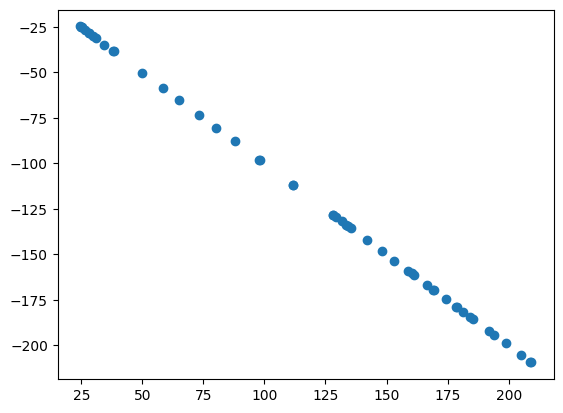

In [13]:
import matplotlib.pyplot as plt

F1 = [obj[i][0] for i in range (len(obj))]
F2 = [obj[i][1] for i in range (len(obj))]

plt.scatter(F1,F2)

## GA

### Ex qqc

In [4]:
import numpy as np

from mealpy import FloatVar, GA

calls = 0
def objective_function(solution):
    global calls
    calls+=1
    return [(solution[0]-1)**2 + (solution[1]-2)**2, (solution[0]+1)**2 + (solution[1]-1)**2]


problem_dict = {

    "bounds": FloatVar( lb=(-10.,) * 2, ub=(10.,) * 2, name="delta"),

    "obj_func": objective_function,

    "minmax": "min",

    "obj_weights": [0.5,0.5],

}


model = GA.BaseGA(epoch=1000, pop_size=50, pc=0.9, pm=0.05)

g_best = model.solve(problem_dict)

print(f"Solution: {g_best.solution}, Fitness: {objective_function(g_best.solution)}")

print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

2024/04/19 09:10:37 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving 2-objective optimization problem with weights: [0.5 0.5].
2024/04/19 09:10:37 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 1.6157449006283562, Global best: 1.6157449006283562, Runtime: 0.00522 seconds
2024/04/19 09:10:37 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 1.6157449006283562, Global best: 1.6157449006283562, Runtime: 0.00317 seconds
2024/04/19 09:10:37 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 1.6157449006283562, Global best: 1.6157449006283562, Runtime: 0.00453 seconds
2024/04/19 09:10:37 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 1.4718372717920807, Global best: 1.4718372717920807, Runtime: 0.00410 seconds
2024/04/19 09:10:37 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 1.4718372717920807, Globa

Solution: [0.00443706 1.4998067 ], Fitness: [1.2413389070261553, 1.2587005426734141]
Solution: [0.00443706 1.4998067 ], Fitness: 1.2500197248497846


In [5]:
print(calls)

50052


### Ackley

In [6]:
import numpy as np

from mealpy import FloatVar, GA

calls = 0
def objective_function(x):
    global calls
    calls+=1
    return -20*np.exp(-0.2*np.sqrt(0.5*(x[0]**2 + x[1]**2+x[2]**2+x[3]**2))) - np.exp(1/4*(np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1])+np.cos(2*np.pi*x[2])+np.cos(2*np.pi*x[3]))) + np.exp(1) +20


problem_dict = {

    "bounds": FloatVar( lb=(-10.,) * 4, ub=(10.,) * 4, name="delta"),

    "obj_func": objective_function,

    "minmax": "min",


}


model = GA.BaseGA(epoch=1000, pop_size=200, pc=0.9, pm=0.05)

g_best = model.solve(problem_dict)

print(f"Solution: {g_best.solution}, Fitness: {objective_function(g_best.solution)}")

print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

2024/04/19 09:10:52 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/04/19 09:10:52 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 6.903607247334854, Global best: 6.903607247334854, Runtime: 0.01912 seconds
2024/04/19 09:10:52 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 4.672515770829516, Global best: 4.672515770829516, Runtime: 0.01513 seconds
2024/04/19 09:10:52 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 4.092086621708731, Global best: 4.092086621708731, Runtime: 0.01536 seconds
2024/04/19 09:10:52 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 3.447741658708047, Global best: 3.447741658708047, Runtime: 0.01532 seconds
2024/04/19 09:10:52 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 2.1865919156198252, Global best: 2.1865919156198252,

Solution: [-0.00279706  0.00093661 -0.0008991   0.00082421], Fitness: 0.00916281315481271
Solution: [-0.00279706  0.00093661 -0.0008991   0.00082421], Fitness: 0.00916281315481271


In [7]:
print(calls)

200202


### Différents paramètres

In [15]:
import numpy as np

from mealpy import FloatVar, GA


def objective_function(solution):

    return np.sum(solution**2)


problem_dict = {

    "bounds": FloatVar( lb=(-10.,) * 30, ub=(10.,) * 30, name="delta"),

    "obj_func": objective_function,

    "minmax": "min",

}


model = GA.BaseGA(epoch=1000, pop_size=50, pc=0.9, pm=0.05)

g_best = model.solve(problem_dict)

print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

2024/04/19 09:21:58 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/04/19 09:21:58 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 479.60347742817595, Global best: 479.60347742817595, Runtime: 0.00320 seconds
2024/04/19 09:21:58 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 479.60347742817595, Global best: 479.60347742817595, Runtime: 0.00683 seconds
2024/04/19 09:21:58 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 409.6152613002774, Global best: 409.6152613002774, Runtime: 0.00531 seconds
2024/04/19 09:21:58 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 330.1923113562479, Global best: 330.1923113562479, Runtime: 0.00351 seconds
2024/04/19 09:21:58 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 305.96364224981795, Global best: 305.96364224981

Solution: [-0.1028943  -0.16704237  0.07358952  0.01511559 -0.03664313 -0.1490522
 -0.025063   -0.25235819 -0.12386364 -0.12776472 -0.26544902 -0.0149835
  0.10232434  0.11828089  0.27974133 -0.01145103 -0.32221601 -0.0844187
 -0.18923889 -0.12578153 -0.17793769 -0.19347963  0.10790791 -0.19191104
  0.07654795 -0.00955833 -0.06664019 -0.28961973  0.12437075  0.08813211], Fitness: 0.7348660556863217
Solution: [-0.1028943  -0.16704237  0.07358952  0.01511559 -0.03664313 -0.1490522
 -0.025063   -0.25235819 -0.12386364 -0.12776472 -0.26544902 -0.0149835
  0.10232434  0.11828089  0.27974133 -0.01145103 -0.32221601 -0.0844187
 -0.18923889 -0.12578153 -0.17793769 -0.19347963  0.10790791 -0.19191104
  0.07654795 -0.00955833 -0.06664019 -0.28961973  0.12437075  0.08813211], Fitness: 0.7348660556863217


In [19]:
model3 = GA.BaseGA(epoch=1000, pop_size=50, pc=0.9, pm=0.05, crossover="one_point", mutation="flip")
g_best = model3.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model3.g_best.solution}, Fitness: {model3.g_best.target.fitness}")

2024/04/19 09:23:56 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/04/19 09:23:56 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 476.96910919490705, Global best: 476.96910919490705, Runtime: 0.00684 seconds
2024/04/19 09:23:56 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 466.9069618732639, Global best: 466.9069618732639, Runtime: 0.00527 seconds
2024/04/19 09:23:56 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 321.3427389127219, Global best: 321.3427389127219, Runtime: 0.00314 seconds
2024/04/19 09:23:56 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 319.01854930846315, Global best: 319.01854930846315, Runtime: 0.00317 seconds
2024/04/19 09:23:56 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 306.31826445720833, Global best: 306.31826445720

Solution: [ 0.04463748 -0.14807112  0.08041469 -0.02835506 -0.01137491  0.0093628
  0.11807141 -0.10929407  0.16877401 -0.06582371  0.03686221 -0.06653134
  0.21179994 -0.15593365 -0.27713132  0.16000699 -0.07227642 -0.33598182
  0.15780742 -0.10025438 -0.29179803 -0.01621662  0.1117774  -0.03920131
 -0.10137517 -0.07005935  0.26989255 -0.45800204  0.04294255 -0.10388989], Fitness: 0.8304044454534455
Solution: [ 0.04463748 -0.14807112  0.08041469 -0.02835506 -0.01137491  0.0093628
  0.11807141 -0.10929407  0.16877401 -0.06582371  0.03686221 -0.06653134
  0.21179994 -0.15593365 -0.27713132  0.16000699 -0.07227642 -0.33598182
  0.15780742 -0.10025438 -0.29179803 -0.01621662  0.1117774  -0.03920131
 -0.10137517 -0.07005935  0.26989255 -0.45800204  0.04294255 -0.10388989], Fitness: 0.8304044454534455


In [20]:
model2 = GA.BaseGA(epoch=1000, pop_size=50, pc=0.9, pm=0.05, selection="tournament", k_way=0.4, crossover="multi_points")
g_best = model2.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

print(f"Solution: {model2.g_best.solution}, Fitness: {model2.g_best.target.fitness}")


2024/04/19 09:24:25 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/04/19 09:24:25 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 522.9665892212882, Global best: 522.9665892212882, Runtime: 0.00569 seconds
2024/04/19 09:24:25 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 447.90162589940013, Global best: 447.90162589940013, Runtime: 0.00365 seconds
2024/04/19 09:24:25 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 352.5721998814497, Global best: 352.5721998814497, Runtime: 0.00446 seconds
2024/04/19 09:24:25 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 285.1507199002855, Global best: 285.1507199002855, Runtime: 0.00436 seconds
2024/04/19 09:24:25 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 239.3238682875226, Global best: 239.3238682875226,

Solution: [ 0.02145406 -0.08324918 -0.04358603 -0.01233011  0.00590734  0.00456853
 -0.00495783 -0.00061636  0.01389287  0.0162591  -0.01189464 -0.00926511
  0.00022615  0.00291749  0.02820883  0.02700651 -0.00537635  0.01078873
  0.02769566  0.01136231  0.0400469   0.02832888 -0.03762535 -0.09030472
 -0.03618368 -0.05488327 -0.00695846 -0.00840077  0.00833765 -0.00478457], Fitness: 0.029292728704119565
Solution: [ 0.02145406 -0.08324918 -0.04358603 -0.01233011  0.00590734  0.00456853
 -0.00495783 -0.00061636  0.01389287  0.0162591  -0.01189464 -0.00926511
  0.00022615  0.00291749  0.02820883  0.02700651 -0.00537635  0.01078873
  0.02769566  0.01136231  0.0400469   0.02832888 -0.03762535 -0.09030472
 -0.03618368 -0.05488327 -0.00695846 -0.00840077  0.00833765 -0.00478457], Fitness: 0.029292728704119565


In [21]:
model4 = GA.BaseGA(epoch=1000, pop_size=50, pc=0.9, pm=0.05, crossover="arithmetic", mutation_multipoints=True, mutation="swap")
g_best = model4.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

print(f"Solution: {model4.g_best.solution}, Fitness: {model4.g_best.target.fitness}")

2024/04/19 09:25:40 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/04/19 09:25:40 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 348.80440765896725, Global best: 348.80440765896725, Runtime: 0.00531 seconds
2024/04/19 09:25:40 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 173.79770660441196, Global best: 173.79770660441196, Runtime: 0.00696 seconds
2024/04/19 09:25:40 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 133.2040947613464, Global best: 133.2040947613464, Runtime: 0.00773 seconds
2024/04/19 09:25:40 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 124.94571891007939, Global best: 124.94571891007939, Runtime: 0.00618 seconds
2024/04/19 09:25:40 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 105.42488151035832, Global best: 105.424881510

Solution: [-0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566
 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566
 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566
 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566
 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566], Fitness: 0.7249938825276995
Solution: [-0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566
 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566
 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566
 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566
 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566 -0.15545566], Fitness: 0.7249938825276995


In [22]:
model5 = GA.BaseGA(epoch=1000, pop_size=50, pc=0.9, pm=0.05, selection="roulette", crossover="multi_points")
g_best = model5.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

print(f"Solution: {model5.g_best.solution}, Fitness: {model5.g_best.target.fitness}")

2024/04/19 09:26:16 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/04/19 09:26:16 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 679.1057080114371, Global best: 679.1057080114371, Runtime: 0.01880 seconds
2024/04/19 09:26:16 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 603.4914323414826, Global best: 603.4914323414826, Runtime: 0.00478 seconds
2024/04/19 09:26:16 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 580.1689844838374, Global best: 580.1689844838374, Runtime: 0.00479 seconds
2024/04/19 09:26:16 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 541.5323193946136, Global best: 541.5323193946136, Runtime: 0.00457 seconds
2024/04/19 09:26:16 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 505.05684215273476, Global best: 505.05684215273476,

Solution: [-1.14277562 -0.67225856 -0.04013942  0.8080841  -1.59556167  0.19616907
 -0.09948135  1.07266316  1.13972886  1.2450824  -0.13454083  0.65209806
 -1.19701448  0.54332803  0.05596592  0.82216159 -0.55895863  0.04338698
 -0.75899381  1.0151554  -0.35577754 -1.0688976  -0.93367974 -1.57392321
  1.05408278 -1.59110944 -0.56487399  0.47473817 -1.188025   -0.24866336], Fitness: 24.05641371177446
Solution: [-1.14277562 -0.67225856 -0.04013942  0.8080841  -1.59556167  0.19616907
 -0.09948135  1.07266316  1.13972886  1.2450824  -0.13454083  0.65209806
 -1.19701448  0.54332803  0.05596592  0.82216159 -0.55895863  0.04338698
 -0.75899381  1.0151554  -0.35577754 -1.0688976  -0.93367974 -1.57392321
  1.05408278 -1.59110944 -0.56487399  0.47473817 -1.188025   -0.24866336], Fitness: 24.05641371177446


In [23]:
model6 = GA.BaseGA(epoch=1000, pop_size=50, pc=0.9, pm=0.05, selection="random", mutation="swap")
g_best = model6.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

print(f"Solution: {model6.g_best.solution}, Fitness: {model6.g_best.target.fitness}")

2024/04/19 09:26:57 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/04/19 09:26:57 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 625.5989863996184, Global best: 486.6239081875146, Runtime: 0.00808 seconds
2024/04/19 09:26:57 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 679.9387091272893, Global best: 486.6239081875146, Runtime: 0.00462 seconds
2024/04/19 09:26:57 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 601.627456443126, Global best: 486.6239081875146, Runtime: 0.00575 seconds
2024/04/19 09:26:57 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 528.197552113568, Global best: 486.6239081875146, Runtime: 0.00581 seconds
2024/04/19 09:26:57 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 537.1634137220046, Global best: 486.6239081875146, Run

Solution: [0.06672312 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312
 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312
 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312
 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312
 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312], Fitness: 0.1335592539564115
Solution: [0.06672312 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312
 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312
 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312
 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312
 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312 0.06672312], Fitness: 0.1335592539564115


In [24]:
model7 = GA.BaseGA(epoch=1000, pop_size=50, pc=0.9, pm=0.05, crossover="arithmetic", mutation="flip")
g_best = model7.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

print(f"Solution: {model7.g_best.solution}, Fitness: {model7.g_best.target.fitness}")

2024/04/19 09:27:34 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2024/04/19 09:27:34 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 306.107416091011, Global best: 306.107416091011, Runtime: 0.00618 seconds
2024/04/19 09:27:34 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 196.1733441193162, Global best: 196.1733441193162, Runtime: 0.00383 seconds
2024/04/19 09:27:34 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 107.9986354587152, Global best: 107.9986354587152, Runtime: 0.00408 seconds
2024/04/19 09:27:34 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 107.85415261749468, Global best: 107.85415261749468, Runtime: 0.00372 seconds
2024/04/19 09:27:34 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 88.3805290205515, Global best: 88.3805290205515, Run

Solution: [ 0.14573123 -0.21995823 -0.09441123 -0.16677946 -0.27332326 -0.07970655
 -0.00393228 -0.07070259  0.03930819 -0.0678829   0.06088862  0.18226641
  0.20216267 -0.07864874  0.09146058  0.00682832 -0.10727133 -0.05389832
 -0.00464874 -0.42612544  0.17017111 -0.16016115  0.02098057 -0.05362733
 -0.07165055  0.10192738  0.2344053   0.17082706  0.11458799  0.15631494], Fitness: 0.6821279027428166
Solution: [ 0.14573123 -0.21995823 -0.09441123 -0.16677946 -0.27332326 -0.07970655
 -0.00393228 -0.07070259  0.03930819 -0.0678829   0.06088862  0.18226641
  0.20216267 -0.07864874  0.09146058  0.00682832 -0.10727133 -0.05389832
 -0.00464874 -0.42612544  0.17017111 -0.16016115  0.02098057 -0.05362733
 -0.07165055  0.10192738  0.2344053   0.17082706  0.11458799  0.15631494], Fitness: 0.6821279027428166


## SA

### Ex qqc


In [31]:
import numpy as np

from mealpy import FloatVar, SA

calls = 0
def objective_function(solution):
    global calls
    calls+=1
    return [(solution[0]-1)**2 + (solution[1]-2)**2, (solution[0]+1)**2 + (solution[1]-1)**2]


problem_dict = {

    "bounds": FloatVar( lb=(-10.,) * 2, ub=(10.,) * 2, name="delta"),

    "minmax": "min",

    "obj_func": objective_function,

    "obj_weights": [1, 0]

}


model = SA.GaussianSA(epoch=1000, pop_size=2, temp_init = 100, cooling_rate = 0.99, scale = 0.1)

g_best = model.solve(problem_dict)

print(f"Solution: {g_best.solution}, Fitness: {objective_function(g_best.solution)}")

print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

2024/04/19 03:14:59 PM, INFO, mealpy.physics_based.SA.GaussianSA: Solving 2-objective optimization problem with weights: [1 0].
2024/04/19 03:14:59 PM, INFO, mealpy.physics_based.SA.GaussianSA: >>>Problem: P, Epoch: 1, Current best: 23.94710359093612, Global best: 23.94710359093612, Runtime: 0.00049 seconds
2024/04/19 03:14:59 PM, INFO, mealpy.physics_based.SA.GaussianSA: >>>Problem: P, Epoch: 2, Current best: 23.94710359093612, Global best: 23.94710359093612, Runtime: 0.00063 seconds
2024/04/19 03:14:59 PM, INFO, mealpy.physics_based.SA.GaussianSA: >>>Problem: P, Epoch: 3, Current best: 23.94710359093612, Global best: 23.94710359093612, Runtime: 0.00018 seconds
2024/04/19 03:14:59 PM, INFO, mealpy.physics_based.SA.GaussianSA: >>>Problem: P, Epoch: 4, Current best: 21.820301743166606, Global best: 21.820301743166606, Runtime: 0.00022 seconds
2024/04/19 03:14:59 PM, INFO, mealpy.physics_based.SA.GaussianSA: >>>Problem: P, Epoch: 5, Current best: 20.428853695956406, Global best: 20.42885

Solution: [0.99803514 1.99829691], Fitness: [6.761166478317238e-06, 4.988741163346916]
Solution: [0.99803514 1.99829691], Fitness: 6.761166478317238e-06


In [9]:
print(calls)

1004


### Ackley

In [33]:
import numpy as np

from mealpy import FloatVar, SA

calls = 0
def objective_function(x):
    global calls
    calls+=1
    return -20*np.exp(-0.2*np.sqrt(1/4*(x[0]**2 + x[1]**2+x[2]**2+x[3]**2))) - np.exp(1/4*(np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1])+np.cos(2*np.pi*x[2])+np.cos(2*np.pi*x[3]))) + np.exp(1) +20


problem_dict = {

    "bounds": FloatVar( lb=(-10.,) * 4, ub=(10.,) * 4, name="delta"),

    "minmax": "min",

    "obj_func": objective_function

}


model = SA.GaussianSA(epoch=10000, pop_size=2000, temp_init = 100, cooling_rate = 0.99, scale = 0.1)

g_best = model.solve(problem_dict)

print(f"Solution: {g_best.solution}, Fitness: {objective_function(g_best.solution)}")

print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

2024/04/19 03:19:36 PM, INFO, mealpy.physics_based.SA.GaussianSA: Solving single objective optimization problem.
2024/04/19 03:19:36 PM, INFO, mealpy.physics_based.SA.GaussianSA: >>>Problem: P, Epoch: 1, Current best: 3.8126450305380146, Global best: 3.8126450305380146, Runtime: 0.00077 seconds
2024/04/19 03:19:36 PM, INFO, mealpy.physics_based.SA.GaussianSA: >>>Problem: P, Epoch: 2, Current best: 3.8126450305380146, Global best: 3.8126450305380146, Runtime: 0.00008 seconds
2024/04/19 03:19:36 PM, INFO, mealpy.physics_based.SA.GaussianSA: >>>Problem: P, Epoch: 3, Current best: 3.502253487730915, Global best: 3.502253487730915, Runtime: 0.00006 seconds
2024/04/19 03:19:36 PM, INFO, mealpy.physics_based.SA.GaussianSA: >>>Problem: P, Epoch: 4, Current best: 3.502253487730915, Global best: 3.502253487730915, Runtime: 0.00011 seconds
2024/04/19 03:19:36 PM, INFO, mealpy.physics_based.SA.GaussianSA: >>>Problem: P, Epoch: 5, Current best: 3.502253487730915, Global best: 3.502253487730915, Run

Solution: [ 0.17487802 -0.1862666   0.08729871  0.07996036], Fitness: 1.370363772388501
Solution: [ 0.17487802 -0.1862666   0.08729871  0.07996036], Fitness: 1.370363772388501


In [11]:
print(calls)

12002


## HS

In [15]:
import numpy as np

from mealpy import FloatVar, HS


def objective_function(solution):

    return np.sum(solution**2)


problem_dict = {

    "bounds": FloatVar( lb=(-10.,) * 30, ub=(10.,) * 30, name="delta"),

    "minmax": "min",

    "obj_func": objective_function

}


model = HS.DevHS(epoch=1000, pop_size=50, c_r = 0.95, pa_r = 0.05)

g_best = model.solve(problem_dict)

print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

2024/04/19 04:15:08 PM, INFO, mealpy.music_based.HS.DevHS: Solving single objective optimization problem.
2024/04/19 04:15:08 PM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 1, Current best: 542.6089582849278, Global best: 542.6089582849278, Runtime: 0.00204 seconds
2024/04/19 04:15:08 PM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 2, Current best: 481.58181053843674, Global best: 481.58181053843674, Runtime: 0.00312 seconds
2024/04/19 04:15:08 PM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 3, Current best: 444.3658116348338, Global best: 444.3658116348338, Runtime: 0.00215 seconds
2024/04/19 04:15:08 PM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 4, Current best: 415.553995158053, Global best: 415.553995158053, Runtime: 0.00448 seconds
2024/04/19 04:15:08 PM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 5, Current best: 372.9947660366002, Global best: 372.9947660366002, Runtime: 0.00693 seconds
2024/04/19 04:15:08 PM, 

Solution: [ 2.00405274e-04 -1.13456790e-03 -2.48063006e-03  6.58682780e-05
  1.09300960e-03  1.25001408e-04  2.06823799e-05 -1.16451729e-03
 -6.55424078e-05 -2.43277384e-03 -1.83613762e-04  1.20184096e-04
 -8.62700744e-04 -7.14063859e-04 -3.67065879e-04  3.80524950e-04
 -8.69276854e-04  2.84198616e-04  2.79566950e-04 -3.19218718e-05
 -4.06291043e-05 -5.92392599e-04  6.48407853e-06  3.92947176e-04
  6.68985755e-05  1.62862874e-04  8.27503715e-04 -1.18133117e-03
 -3.13771021e-05 -7.01615759e-04], Fitness: 2.1583785012204722e-05
Solution: [ 2.00405274e-04 -1.13456790e-03 -2.48063006e-03  6.58682780e-05
  1.09300960e-03  1.25001408e-04  2.06823799e-05 -1.16451729e-03
 -6.55424078e-05 -2.43277384e-03 -1.83613762e-04  1.20184096e-04
 -8.62700744e-04 -7.14063859e-04 -3.67065879e-04  3.80524950e-04
 -8.69276854e-04  2.84198616e-04  2.79566950e-04 -3.19218718e-05
 -4.06291043e-05 -5.92392599e-04  6.48407853e-06  3.92947176e-04
  6.68985755e-05  1.62862874e-04  8.27503715e-04 -1.18133117e-03
 -3

In [18]:
import numpy as np
from mealpy import PSO, FloatVar

## This is how you design Constrained Benchmark Function (G01)
#### Link: https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119136507.app2
def objective_function(solution):
    def g1(x):
        return x[0]**2+x[1]**2-225
    def g2(x):
        return x[0]-3*x[1] +10

    def violate(value):
        return 0 if value <= 0 else value

    fx1 = (solution[0]-2)**2 + (solution[1]-1)**2 +2
    fx2 = 9*solution[0] - (solution[1]-1)**2

    ## Increase the punishment for g1 and g4 to boost the algorithm (You can choice any constraint instead of g1 and g4)
    fx1 += violate(g1(solution)) ** 2 + violate(g2(solution)) 
    fx2 += violate(g1(solution)) ** 2 + violate(g2(solution)) 
    return [fx1,fx2]

## Design a problem dictionary for constrained objective function above
problem_constrained = {
  "obj_func": objective_function,
  "bounds": FloatVar(lb=[-20, -20], ub=[20, 20]),
  "minmax": "min",
  "obj_weights": [0.5,0.5]
}

## Define the model and solve the problem
model = HS.DevHS(epoch=200, pop_size=50, c_r = 0.95, pa_r = 0.05)
obj = []
for i in range (50):
    sol = model.solve(problem=problem_constrained).solution
    obj.append(objective_function(sol))

2024/04/19 04:17:04 PM, INFO, mealpy.music_based.HS.DevHS: Solving 2-objective optimization problem with weights: [0.5 0.5].
2024/04/19 04:17:04 PM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 1, Current best: 0.0005426698359194404, Global best: 0.0005426698359194404, Runtime: 0.00504 seconds
2024/04/19 04:17:04 PM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 2, Current best: 0.0005426698359087823, Global best: 0.0005426698359087823, Runtime: 0.00201 seconds
2024/04/19 04:17:04 PM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 3, Current best: -0.0176229129236134, Global best: -0.0176229129236134, Runtime: 0.00446 seconds
2024/04/19 04:17:04 PM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 4, Current best: -0.0176229129236134, Global best: -0.0176229129236134, Runtime: 0.00585 seconds
2024/04/19 04:17:04 PM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 5, Current best: -0.022131582005883388, Global best: -0.022131582005883388

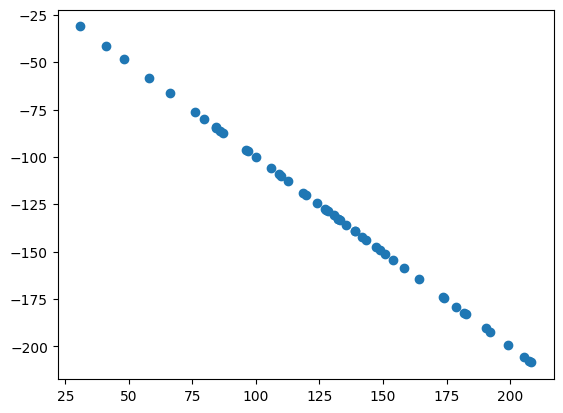

In [19]:
import matplotlib.pyplot as plt

F1 = [obj[i][0] for i in range (len(obj))]
F2 = [obj[i][1] for i in range (len(obj))]

plt.scatter(F1,F2)

### Ackley

In [27]:
calls = 0
def objective_function(x):
    global calls
    calls+=1
    return -20*np.exp(-0.2*np.sqrt(0.5*(x[0]**2 + x[1]**2+x[2]**2+x[3]**2))) - np.exp(1/4*(np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1])+np.cos(2*np.pi*x[2])+np.cos(2*np.pi*x[3]))) + np.exp(1) +20


problem_dict = {

    "bounds": FloatVar( lb=(-10.,) * 4, ub=(10.,) * 4, name="delta"),

    "minmax": "min",

    "obj_func": objective_function

}

model = HS.DevHS(epoch=1000, pop_size=50, c_r = 0.95, pa_r = 0.05)

g_best = model.solve(problem_dict)

print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")

print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

2024/04/19 09:55:02 AM, INFO, mealpy.music_based.HS.DevHS: Solving single objective optimization problem.
2024/04/19 09:55:02 AM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 1, Current best: 6.802877902403246, Global best: 6.802877902403246, Runtime: 0.00191 seconds
2024/04/19 09:55:02 AM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 2, Current best: 5.594814511685421, Global best: 5.594814511685421, Runtime: 0.00253 seconds
2024/04/19 09:55:02 AM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 3, Current best: 5.566264643280437, Global best: 5.566264643280437, Runtime: 0.00466 seconds
2024/04/19 09:55:02 AM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 4, Current best: 5.557677779252895, Global best: 5.557677779252895, Runtime: 0.00300 seconds
2024/04/19 09:55:02 AM, INFO, mealpy.music_based.HS.DevHS: >>>Problem: P, Epoch: 5, Current best: 5.347588929583022, Global best: 5.347588929583022, Runtime: 0.00219 seconds
2024/04/19 09:55:02 AM, 

Solution: [ 8.99118813e-06  2.22794847e-05  1.53185415e-05 -5.89854057e-05], Fitness: 0.0001853381699774559
Solution: [ 8.99118813e-06  2.22794847e-05  1.53185415e-05 -5.89854057e-05], Fitness: 0.0001853381699774559
